###Continuamos en nuevo Colab, para no saturar RAM y continuar el proyecto sin problemas. No hago importación del Colab anterior, para no tener el mismo problema. Por lo que volvemos a descargar dataset, y declarar las variables básicas nuevamente.

In [177]:
! wget http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Video_Games_5.json.gz

--2022-07-03 17:54:13--  http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Video_Games_5.json.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113104579 (108M) [application/x-gzip]
Saving to: ‘reviews_Video_Games_5.json.gz.2’

reviews_Video_Games 100%[===================>] 107.86M  57.4MB/s    in 1.9s    

2022-07-03 17:54:15 (57.4 MB/s) - ‘reviews_Video_Games_5.json.gz.2’ saved [113104579/113104579]



In [178]:
import pandas as pd
df_video_games = pd.read_json("reviews_Video_Games_5.json.gz", lines=True, compression='gzip')

In [179]:
df_video_games.shape

(231780, 9)

In [180]:
#Nos quedamos con las columnas que realmente nos interesan para el proyecto práctica (reviewText y overall)
df_video_games = df_video_games[['reviewText', 'overall']]

In [181]:
df_video_games.shape

(231780, 2)

### Balanceo del dataset

In [182]:
df_video_games_pos = df_video_games[df_video_games.overall >= 3]
df_video_games_neg = df_video_games[df_video_games.overall < 3]

In [183]:
df_video_games_pos_red =  df_video_games_pos.sample(n=28516, random_state= 30)

In [184]:
df_video_games_balanced = pd.concat([df_video_games_pos_red, df_video_games_neg], axis = 0)

In [185]:
print("El número de reviews positivas son:",df_video_games_balanced.loc[df_video_games_balanced.overall.between(3,5), 'overall'].count())
print("El número de reviews negativas son:",df_video_games_balanced.loc[df_video_games_balanced.overall.between(0, 2.9), 'overall'].count())

El número de reviews positivas son: 28516
El número de reviews negativas son: 28516


In [186]:
df_video_games_balanced.dtypes

reviewText    object
overall        int64
dtype: object

# 2. Preprocesado

In [187]:
list_reviews  = df_video_games_balanced["reviewText"].tolist()

In [188]:
list_overall = df_video_games_balanced["overall"].tolist()

In [189]:
!pip install num2words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [190]:
#!pip install stop_words

In [191]:
import unicodedata
import nltk
from num2words import num2words

from nltk import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
#from stop_words import get_stop_words


def nltk_cleaner(text, tokenizer, sw_list, lemmatizer):
    clean_text = list()
    
    # Eliminamos ciertos aspectos del dataset
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    
    # Separamos las palabras eliminando signos de puntuación, ya que es mejor para poder ver los resultados de los modelos.
    for word in tokenizer.tokenize(text):
        
        # Eliminamos los stopwords, (y justo, posteriormente añadiremos otros), de acuerdo a lo arrojado en la parte de visualización.
        if word not in sw_list:
            
        # Eliminamos espacios sobrantes, convertimos a minúsculas y lematizamos para poder tener de una manera equilibrada tanto los textos como los tiempos verbales de las frases de las reviews.
            clean_word = lemmatizer.lemmatize(word).lower().strip()
        
        # Convertimos los dígitos a palabras para una mejor interpretación de las frases en en el momento de ejecutar los modelos. 
            if clean_word.isdigit():
                clean_word = num2words(clean_word, lang='en')

            clean_text.append(clean_word)
            
    return ' '.join(clean_text)

In [192]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [193]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [194]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [195]:
tokenizer = RegexpTokenizer(r'\w+')
sw_list = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

In [196]:
#Añadimos a los stopwords, palabras que vemos en el gráfico de frecuencia de palabras o que son comunes del tema, y/o no nos darán mejor información.
new_stopwords = ['game','games', 'will', 'play', 'playing' ]
sw_list.extend(new_stopwords)

In [197]:
if 'game' and 'games' in sw_list:
  print('Yes')

Yes


In [198]:
clean_reviews = []
for review in list_reviews:
   clean_reviews.append(nltk_cleaner(review, tokenizer, sw_list, lemmatizer))

In [199]:
clean_reviews[1]

'this great with many different choice learn develop technique one i going stick if continue every day almost sixty day really good chance learn perform one song learning guitar well take lot practice this definitely make much fun it definitely kept wanting continue learning i spent hour day far i get tired houri stop but variety choice make keep coming back continue progress the includes rocksmith real tone cable one end usb plug xbox end one four thirty-four stereo jack plug guitar i remember first rocksmith two year ago nov two thousand and eleven i beginner time it fun butat time frustrating not i beginner registering accurately i played month put frustration and i never continued learn either now new two thousand and fourteen version released nov two thousand and thirteen much better interacts register lot better first ask initial question determine skill level setting uplay account required provide benefit i setup account the calibration tuning next i completely frustrated stuck 

Volvemos a convertir la lista limpia de las reviews y la de las etiquietas(estrellas) a dataframe, y lo unimos en un nuevo df.


In [200]:
df_video_games_balanced_clean = pd.DataFrame (clean_reviews, columns = ['reviewText'])
print (df_video_games_balanced_clean.head(10))

                                          reviewText
0                                     love dance fun
1  this great with many different choice learn de...
2  super mario sixty-four original nintendo sixty...
3  ok i begin there many naysayer behind socom gu...
4  if found yoshi touch go lacking do not buy thi...
5  this old school yes point click adventure funn...
6  this beenan expansion pack sim theme park pric...
7  i feel like writing review excellent i played ...
8  the new super mario bros nintendo ds super fun...
9  anyone rating low save issue kinda missed thin...


In [201]:
df_list_overall = pd.DataFrame (list_overall, columns = ['overall'])
print (df_list_overall.head(10))

   overall
0        5
1        5
2        5
3        5
4        4
5        5
6        3
7        5
8        5
9        5


In [202]:
#Los unimos: 
df_video_games_balanced_clean['overall'] = df_list_overall
#Comprobamos que se ha hecho correctamente y es igual al dataset balanceado anterior. 
print(df_video_games_balanced_clean.head(20))

                                           reviewText  overall
0                                      love dance fun        5
1   this great with many different choice learn de...        5
2   super mario sixty-four original nintendo sixty...        5
3   ok i begin there many naysayer behind socom gu...        5
4   if found yoshi touch go lacking do not buy thi...        4
5   this old school yes point click adventure funn...        5
6   this beenan expansion pack sim theme park pric...        3
7   i feel like writing review excellent i played ...        5
8   the new super mario bros nintendo ds super fun...        5
9   anyone rating low save issue kinda missed thin...        5
10  don get wrong still humor fallout three still ...        4
11  i downloaded demo the cursed crusade trying sl...        4
12  after hearing ton good review decided give try...        4
13  i put twenty hour gameplay far find extremely ...        4
14  this single player review wic its hard underst...  

In [203]:
df_video_games_balanced.head(20)

,reviewText,overall
158314,love the just dance games fun . . . . . . . ...,5
224238,This is a great game. With so many different c...,5
52118,"""Super Mario 64"" for the original Nintendo 64 ...",5
198323,"Ok, before I begin, There are many naysayers b...",5
54063,"If you found Yoshi Touch & Go lacking, DO NOT ...",4
10451,This is an old school game. yes its a point an...,5
15866,This game should have beenan expansion pack to...,3
112152,"I do not feel like writing a review, but this ...",5
66023,The New Super Mario Bros. for the Nintendo DS ...,5
136350,Anyone who is rating this game low because of ...,5


In [204]:
print(df_video_games_balanced.shape)
print(df_video_games_balanced_clean.shape)

(57032, 2)
(57032, 2)


Añadimos una columna para tener una clasificación más exacta. Overall <3 será 0 y Overall >= 3 será 1. De esta forma será una clasificacioóm binaria

In [205]:
set(df_video_games_balanced_clean['overall'])

{1, 2, 3, 4, 5}

In [206]:
def label_sentiment(row):
    if int(row['overall']) < 3:
        return 0
    else:
        return 1

In [207]:
df_video_games_balanced_clean['overall_label'] = df_video_games_balanced_clean.apply(lambda row: label_sentiment(row), axis=1)

In [208]:
df_video_games_balanced_clean.head(10)

,reviewText,overall,overall_label
0,love dance fun,5,1
1,this great with many different choice learn de...,5,1
2,super mario sixty-four original nintendo sixty...,5,1
3,ok i begin there many naysayer behind socom gu...,5,1
4,if found yoshi touch go lacking do not buy thi...,4,1
5,this old school yes point click adventure funn...,5,1
6,this beenan expansion pack sim theme park pric...,3,1
7,i feel like writing review excellent i played ...,5,1
8,the new super mario bros nintendo ds super fun...,5,1
9,anyone rating low save issue kinda missed thin...,5,1


In [209]:
df_video_games_balanced_clean.overall_label.value_counts()

1    28516
0    28516
Name: overall_label, dtype: int64

In [210]:
#Pasamos la columna reviewText a texto, para poder pasarla a al TF-IDF
df_video_games_balanced_clean['reviewText'] = df_video_games_balanced_clean['reviewText'].str.lower()

In [211]:
df_video_games_balanced_clean.head(10)

,reviewText,overall,overall_label
0,love dance fun,5,1
1,this great with many different choice learn de...,5,1
2,super mario sixty-four original nintendo sixty...,5,1
3,ok i begin there many naysayer behind socom gu...,5,1
4,if found yoshi touch go lacking do not buy thi...,4,1
5,this old school yes point click adventure funn...,5,1
6,this beenan expansion pack sim theme park pric...,3,1
7,i feel like writing review excellent i played ...,5,1
8,the new super mario bros nintendo ds super fun...,5,1
9,anyone rating low save issue kinda missed thin...,5,1


# 3. Etapa de entrenamiento y testeo de un modelo de análisis de sentimiento

## Machine learning

### Separamos en conjunto de train y test

In [212]:
from sklearn.model_selection import train_test_split

In [213]:
X_train, X_test, y_train, y_test = train_test_split(
    df_video_games_balanced_clean['reviewText'],
    df_video_games_balanced_clean['overall_label'],
    train_size=0.80,
    test_size=0.20,
    random_state=6,
    stratify=df_video_games_balanced_clean['overall_label']
)

In [214]:
y_train.value_counts()

1    22813
0    22812
Name: overall_label, dtype: int64

In [215]:
y_test.value_counts()

0    5704
1    5703
Name: overall_label, dtype: int64

In [216]:
X_train.iloc[:5]

52007    i agree apparently half review the pro pretty ...
55029    ps4 bricked blue light death ps4 broke two hou...
1856     dark souls epic action rpg great character dev...
4303     the that bad i decided use couple buck see nea...
50250    the novelty quickly wear first sequence this s...
Name: reviewText, dtype: object

In [217]:
y_train.iloc[:5]

52007    0
55029    0
1856     1
4303     1
50250    0
Name: overall_label, dtype: int64

### TF-IDF Vectorizer (utilizamos TF-IDF Vectorizer, ya que es mejor que el count vectorizer en cuanto a tener en cuenta el peso de las palabras en el corpus

In [218]:
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve

In [219]:
# TfIdfVectorizer simple
tfidf_simple = TfidfVectorizer()
X_train_tfidf_simple = tfidf_simple.fit_transform(X_train)
X_test_tfidf_simple = tfidf_simple.transform(X_test)

# TfIdfVectorizer complejo
tfidf_complex = TfidfVectorizer(ngram_range=(1, 3), max_features=5000, max_df=0.95, min_df=0.05)
X_train_tfidf_complex = tfidf_simple.fit_transform(X_train)
X_test_tfidf_complex = tfidf_simple.transform(X_test)

###Regresión logística

In [220]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [221]:
lr_tfidf_simple = LogisticRegression()
lr_tfidf_complex = LogisticRegression()

In [222]:
lr_tfidf_simple.fit(X_train_tfidf_simple, y_train)  # train
y_pred_tfidf_simple = lr_tfidf_simple.predict(X_test_tfidf_simple)  # test

In [223]:
lr_tfidf_complex.fit(X_train_tfidf_complex, y_train)  # train
y_pred_tfidf_complex = lr_tfidf_complex.predict(X_test_tfidf_complex)  # test

In [224]:
print('TfIdfVectorizer simple\n')
print(confusion_matrix(y_test, y_pred_tfidf_simple))
print(classification_report(y_test, y_pred_tfidf_simple))

TfIdfVectorizer simple

[[4860  844]
 [ 890 4813]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      5704
           1       0.85      0.84      0.85      5703

    accuracy                           0.85     11407
   macro avg       0.85      0.85      0.85     11407
weighted avg       0.85      0.85      0.85     11407



In [225]:
print('TfIdfVectorizer complejo\n')
print(confusion_matrix(y_test, y_pred_tfidf_complex))
print(classification_report(y_test, y_pred_tfidf_complex))

TfIdfVectorizer complejo

[[4860  844]
 [ 890 4813]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      5704
           1       0.85      0.84      0.85      5703

    accuracy                           0.85     11407
   macro avg       0.85      0.85      0.85     11407
weighted avg       0.85      0.85      0.85     11407



### Gradient Boosting Classifier

In [226]:
from sklearn.ensemble import GradientBoostingClassifier

n_estimators = 50

def classify_gboost(X_train, X_test, y_train, y_test):        
    clf = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=0.2, max_depth=10, random_state=30)

    clf.fit(X_train, y_train)
    
    print("[{}] Accuracy: train = {}, test = {}".format(
            clf.__class__.__name__,
            clf.score(X_train, y_train),
            clf.score(X_test, y_test)))
    
    return clf

In [227]:
cv = TfidfVectorizer(
    ngram_range=(1, 3),
    max_df=0.95,
    min_df=3,
    max_features=2800
)

cv.fit(X_train)


TfidfVectorizer(max_df=0.95, max_features=2800, min_df=3, ngram_range=(1, 3))

In [228]:
X_train_ = cv.transform(X_train)
X_test_ = cv.transform(X_test)

In [229]:
import sklearn.preprocessing as pr
X_train_ = pr.normalize(X_train_, axis=1)
X_test_ = pr.normalize(X_test_, axis=1)

In [230]:
clf2 = classify_gboost(X_train_, X_test_, y_train, y_test)

[GradientBoostingClassifier] Accuracy: train = 0.9235506849315068, test = 0.8029280266503025


Podemos ver que en este caso el Accuracy de train es más o menos bueno, pero no el de test, y a su vez, podemos ver que hay un poco de Overfitting y el modelo no generaliza del todo bien. 

## Deep Learning (no se ha podido continuar) 

###Word2Vec

In [231]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

In [232]:
df_video_games_balanced_clean_DL = df_video_games_balanced_clean

In [233]:
df_video_games_balanced_clean_DL['reviewText'] = [_text.split() for _text in df_video_games_balanced_clean.reviewText]

In [234]:
sg_params = {
    'size': 150,
    'window': 10,
    'min_count': 8,
    'sg': 1,
    'hs': 0,
    'negative': 20
}

cbow_params = {
    'size': 25,
    'window': 5,
    'min_count': 5,
    'sg': 0,
    'hs': 1,
}

In [235]:
# Skip Gram
w2v_sg = Word2Vec(**sg_params)

In [236]:
# CBOW
w2v_cbow = Word2Vec(**cbow_params)

In [237]:
# Skip Gram
w2v_sg.build_vocab(df_video_games_balanced_clean_DL['reviewText'])

In [238]:
# CBOW
w2v_cbow.build_vocab(df_video_games_balanced_clean_DL['reviewText'])

In [239]:
print('Vocabulario compuesto por {} palabras'.format(len(w2v_sg.wv.vocab)))

Vocabulario compuesto por 20057 palabras


In [240]:
print('Vocabulario compuesto por {} palabras'.format(len(w2v_cbow.wv.vocab)))

Vocabulario compuesto por 25601 palabras


In [241]:
# Skip Gram
w2v_sg.train(sentences=df_video_games_balanced_clean_DL['reviewText'], total_examples=w2v_sg.corpus_count, epochs=2)

(11669204, 12998050)

In [242]:
# CBOW
w2v_cbow.train(sentences=df_video_games_balanced_clean_DL['reviewText'], total_examples=w2v_cbow.corpus_count, epochs=2)

(11738521, 12998050)

In [243]:
#Vamos a ver las palabras más similares
def print_sim_words(word, model1, model2):
    query = "Most similar to {}".format(word) 
    print(query)
    print("-"*len(query))
    for (sim1, sim2) in zip(model1.wv.most_similar(word), model2.wv.most_similar(word)):
        print("{}:{}{:.3f}{}{}:{}{:.3f}".format(sim1[0],
                                               " "*(20-len(sim1[0])), 
                                               sim1[1], 
                                               " "*10, 
                                               sim2[0],
                                               " "*(20-len(sim2[0])),
                                               sim2[1]))
    print("\n")

In [244]:
print_sim_words('fun', w2v_cbow, w2v_sg)
print_sim_words('bad', w2v_cbow, w2v_sg)
print_sim_words('enjoy', w2v_cbow, w2v_sg)
print_sim_words('graphic', w2v_cbow, w2v_sg)

Most similar to fun
-------------------
addicting:           0.860          enjoyable:           0.779
entertaining:        0.821          funner:              0.766
addictive:           0.818          replayable:          0.764
boring:              0.805          wayyy:               0.758
challenging:         0.800          entertaining:        0.750
exciting:            0.787          repetitiveness:      0.750
enjoyable:           0.782          multilayer:          0.750
repetive:            0.774          waster:              0.749
simplistic:          0.762          stimulating:         0.749
bore:                0.759          extremly:            0.745


Most similar to bad
-------------------
awful:               0.923          good:                0.806
terrible:            0.904          horrible:            0.781
horrible:            0.898          terrible:            0.773
suck:                0.885          sucky:               0.741
crappy:              0.821          

Podemos ver que el cbow, va un poco mejor que Skip gram

### Separamos en conjunto de train y test para el modelo de Deep Learning

In [245]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    df_video_games_balanced_clean_DL['reviewText'],
    df_video_games_balanced_clean_DL['overall_label'],
    train_size=0.80,
    test_size=0.20,
    random_state=6,
    stratify=df_video_games_balanced_clean_DL['overall_label']
)

In [246]:
y_train2.value_counts()

1    22813
0    22812
Name: overall_label, dtype: int64

In [247]:
y_test2.value_counts()

0    5704
1    5703
Name: overall_label, dtype: int64

In [248]:
X_train2.iloc[:5]

52007    [i, agree, apparently, half, review, the, pro,...
55029    [ps4, bricked, blue, light, death, ps4, broke,...
1856     [dark, souls, epic, action, rpg, great, charac...
4303     [the, that, bad, i, decided, use, couple, buck...
50250    [the, novelty, quickly, wear, first, sequence,...
Name: reviewText, dtype: object

In [249]:
y_train2.iloc[:5]

52007    0
55029    0
1856     1
4303     1
50250    0
Name: overall_label, dtype: int64

Vemos la media de palabras por frase

In [250]:
max = 0
mean = []
for example in X_train2:
  length = len(example)
  mean.append(len(example))
  if length > max:
    max = length

In [251]:
max

3139

In [252]:
print(len(mean))
print(sum(mean) / len(mean))

45625
114.45867397260274


In [253]:
X_train2

52007    [i, agree, apparently, half, review, the, pro,...
55029    [ps4, bricked, blue, light, death, ps4, broke,...
1856     [dark, souls, epic, action, rpg, great, charac...
4303     [the, that, bad, i, decided, use, couple, buck...
50250    [the, novelty, quickly, wear, first, sequence,...
                               ...                        
23911    [i, going, buy, opening, day, i, hesitated, i,...
7791     [the, magician, quest, decent, the, graphic, n...
37650    [i, looking, forward, getting, utilizes, wii, ...
47367    [i, using, logitech, g9, five, year, this, rat...
24233    [i, really, like, i, think, best, want, charge...
Name: reviewText, Length: 45625, dtype: object

###Modelo Deep Learning

In [254]:
from keras.preprocessing import sequence

max_words = 800

X_train2 = sequence.pad_sequences(X_train2, maxlen=max_words)
X_test2 = sequence.pad_sequences(X_test2, maxlen=max_words)

ValueError: ignored

In [255]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, GRUV2, SimpleRNN

embedding_size = 32
vocabulary_size = len(w2v_cbow.wv.vocab)
max_words = 706
model = Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 706, 32)           819232    
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 872,533
Trainable params: 872,533
Non-trainable params: 0
_________________________________________________________________
None


In [256]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [257]:
import gensim
import multiprocessing as mp

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Dropout,
    Embedding,
    LSTM,
)
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.preprocessing import LabelEncoder

In [258]:
batch_size = 64
num_epochs = 1

X_valid, y_valid = X_train2[:batch_size], y_train2[:batch_size]  # first batch_size samples
X_train3, y_train3 = X_train2[batch_size:], y_train2[batch_size:]  # rest for training

model.fit(X_train3, y_train3,
          validation_data=(X_valid, y_valid),
          batch_size=batch_size, epochs=num_epochs)

ValueError: ignored

#4. Reporte de métricas y conclusiones

In [259]:
X_train_2 = X_train_
X_test_2 = X_test_

##Regresión Logística

In [260]:
c_params = [0.01, 0.05, 0.25, 0.5, 1, 10, 100, 1000, 10000]

train_acc = list()
test_acc = list()
for c in c_params:
    lr = LogisticRegression(C=c, solver='lbfgs', max_iter=500)
    lr.fit(X_train_, y_train)
    
    train_predict = lr.predict(X_train_)
    test_predict = lr.predict(X_test_)
    
    print ("Accuracy for C={}: {}".format(c, accuracy_score(y_test, test_predict)))
    
    train_acc.append(accuracy_score(y_train, train_predict))
    test_acc.append(accuracy_score(y_test, test_predict))

Accuracy for C=0.01: 0.8087139475760498
Accuracy for C=0.05: 0.8286140089418778
Accuracy for C=0.25: 0.8413255018848076
Accuracy for C=0.5: 0.8453581134391164
Accuracy for C=1: 0.844569124221969
Accuracy for C=10: 0.8429034803191023
Accuracy for C=100: 0.8407118436048041


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy for C=1000: 0.8407118436048041
Accuracy for C=10000: 0.8406241781362321


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [261]:
print('Confussion matrix:\n{}'.format(confusion_matrix(y_test, test_predict)))
print('\nClassification report:\n{}'.format(classification_report(y_test, test_predict)))
print('Accuracy score:{}'.format(accuracy_score(y_test, test_predict)))

Confussion matrix:
[[4795  909]
 [ 909 4794]]

Classification report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      5704
           1       0.84      0.84      0.84      5703

    accuracy                           0.84     11407
   macro avg       0.84      0.84      0.84     11407
weighted avg       0.84      0.84      0.84     11407

Accuracy score:0.8406241781362321


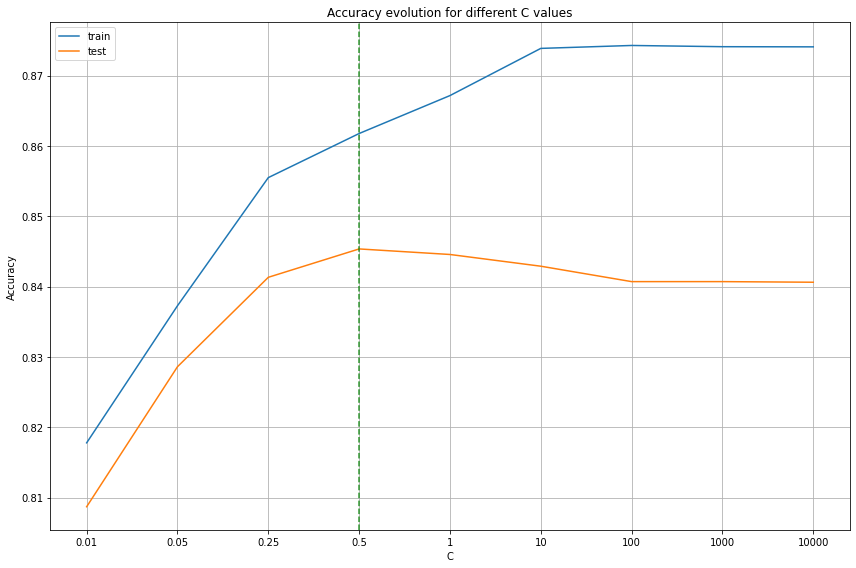

In [262]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 8))
plt.plot(train_acc, label='train')
plt.plot(test_acc, label='test')
plt.axvline(np.argmax(test_acc), c='g', ls='--', alpha=0.8)
plt.title('Accuracy evolution for different C values')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.xticks(list(range(len(c_params))), c_params)
plt.tight_layout()
plt.show()

##Gradient Boosting Classifier

In [263]:
c_params2 = [0.01, 0.05, 0.25, 0.5, 1, 10] #100, 1000, 10000

train_acc2 = list()
test_acc2 = list()
for c2 in c_params2:
    clf = GradientBoostingClassifier(n_estimators=50, max_depth=10, random_state=30)
    clf.fit(X_train_2, y_train)
    
    train_predict2 = clf.predict(X_train_2)
    test_predict2 = clf.predict(X_test_2)
    
    print ("Accuracy for C2={}: {}".format(c2, accuracy_score(y_test, test_predict2)))
    
    train_acc2.append(accuracy_score(y_train, train_predict2))
    test_acc2.append(accuracy_score(y_test, test_predict2))

Accuracy for C2=0.01: 0.7894275444902253
Accuracy for C2=0.05: 0.7894275444902253
Accuracy for C2=0.25: 0.7894275444902253
Accuracy for C2=0.5: 0.7894275444902253
Accuracy for C2=1: 0.7894275444902253
Accuracy for C2=10: 0.7894275444902253


In [264]:
print('Confussion matrix:\n{}'.format(confusion_matrix(y_test, test_predict2)))
print('\nClassification report:\n{}'.format(classification_report(y_test, test_predict2)))
print('Accuracy score:{}'.format(accuracy_score(y_test, test_predict2)))

Confussion matrix:
[[4596 1108]
 [1294 4409]]

Classification report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.79      5704
           1       0.80      0.77      0.79      5703

    accuracy                           0.79     11407
   macro avg       0.79      0.79      0.79     11407
weighted avg       0.79      0.79      0.79     11407

Accuracy score:0.7894275444902253


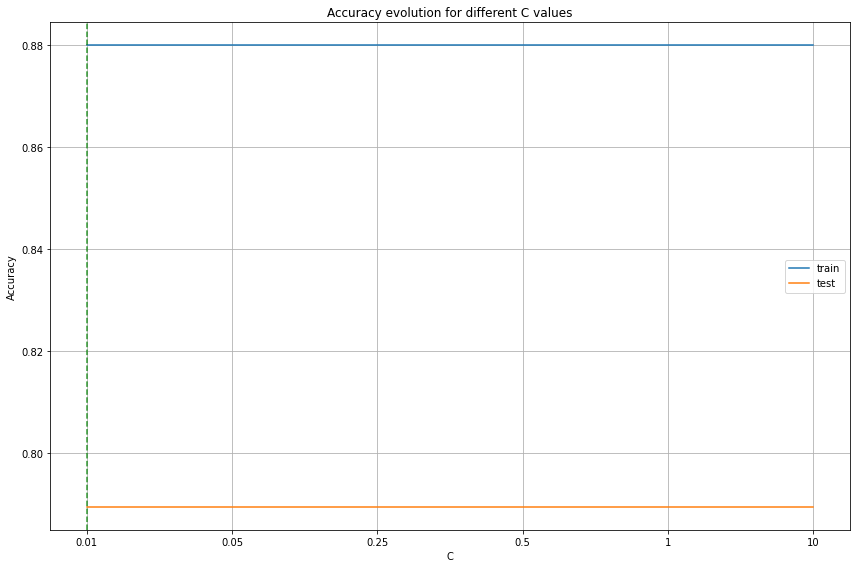

In [265]:
plt.figure(figsize=(12, 8))
plt.plot(train_acc2, label='train')
plt.plot(test_acc2, label='test')
plt.axvline(np.argmax(test_acc2), c='g', ls='--', alpha=0.8)
plt.title('Accuracy evolution for different C values')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.xticks(list(range(len(c_params2))), c_params2)
plt.tight_layout()
plt.show()

Como hemos podido ver, el modelo de regresion lógistica que hemos aplicado durante el proyecto, no arroja unos resultados muy convincentes (0.85 en su mayoría),pero en el momento de pasarlo a diferentes LR, y ver sus posibles soluciones, si que que las métricas obtenidas son más razonables. 

En el modelo de Gradient Boosting, tenemos que hay overfitting claramente, ya que el modelo expulsa unos resultados más o menos buenos en train, pero bajan considerablemente en test. En cambio, cuando lo pasamos a diferentes métricas, nos arroja un resultado exactamente igual (consistente, pero no exactamente bueno).

Es probable que, con una distribución de datos más adecuada, así como la implementación de algunos stopwords adicionales, nos pudieran mejorar los modelos de manera más adecuada de acuerdo a los objetivos del proyecto.

Para ser un contacto inicial con los datos, quizás no son tan malos. Es cuestión de rasgar en el preprocesamiento y entrenamiento de los mismos, para que puedan ser considerablemente mejores. 